#**Importing necessary library packages**

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from matplotlib.table import Table
import time
from tabulate import tabulate

#**Loading the password dataset**

In [228]:
print("Loading The password_DATA:")
password = pd.read_csv('/content/passwords.csv')
password.head()

Loading The password_DATA:


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


#**Exploratory Data Analysis**

#Display the data information

In [229]:
print("Data Info:")
password.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


#**Data Preprocessing**

#Checking for missing values

In [230]:
print("Checking For Missing Values:")
missing_values = password.isnull().sum()
print(missing_values)

Checking For Missing Values:
rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64


#Droping for missing(Nan) values

In [231]:
password_data = password.dropna()

#After the Checking for missing(Nan) values

In [232]:
print("After checking for Missing Values:")
password_data.isnull().sum()

After checking for Missing Values:


rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64

#**Statistical Analysis**

In [233]:
print("Summary Statistic:")
password_data.describe()

Summary Statistic:


,rank,value,offline_crack_sec,rank_alt,strength,font_size
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,250.500000,5.602660,5.000096e-01,251.224000,7.432000,10.298000
std,144.481833,8.436005,2.658132e+00,145.052163,5.415536,3.651282
min,1.000000,1.290000,1.110000e-07,1.000000,0.000000,0.000000
25%,125.750000,3.430000,3.210000e-03,125.750000,6.000000,10.000000
50%,250.500000,3.720000,3.210000e-03,251.500000,7.000000,11.000000
75%,375.250000,3.720000,8.350000e-02,376.250000,8.000000,11.000000
max,500.000000,92.270000,2.927000e+01,502.000000,48.000000,28.000000


#**Analyze the Typology**

#Average Password Strength by Time Unit

<ipython-input-234-fa392b493a14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='time_unit', y='strength', data=average_strength, palette='viridis')


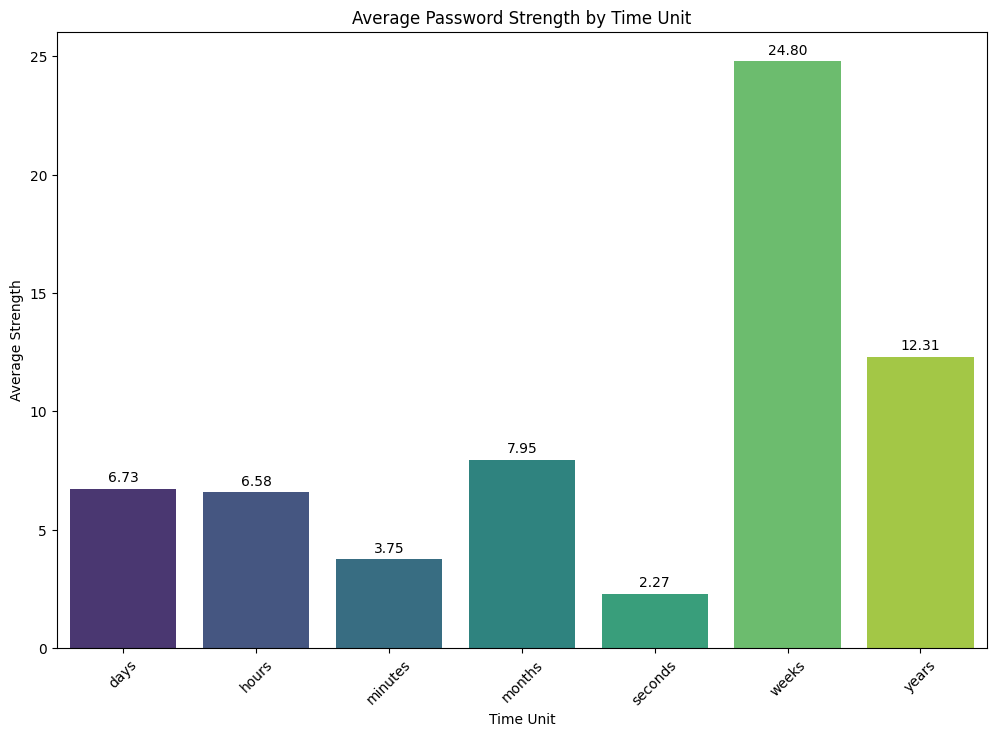

In [234]:
average_strength = password_data.groupby('time_unit')['strength'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='time_unit', y='strength', data=average_strength, palette='viridis')

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0, 8), textcoords='offset points')

plt.title('Average Password Strength by Time Unit')
plt.xlabel('Time Unit')
plt.ylabel('Average Strength')
plt.xticks(rotation=45)
plt.show()

#Proportion of Password Categories

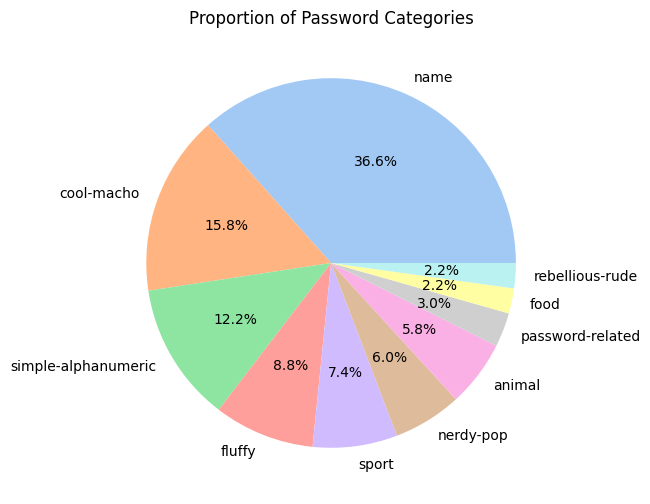

In [235]:
category_counts = password_data['category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Password Categories')
plt.show()

#Complexity of Password Strength vs. Rank

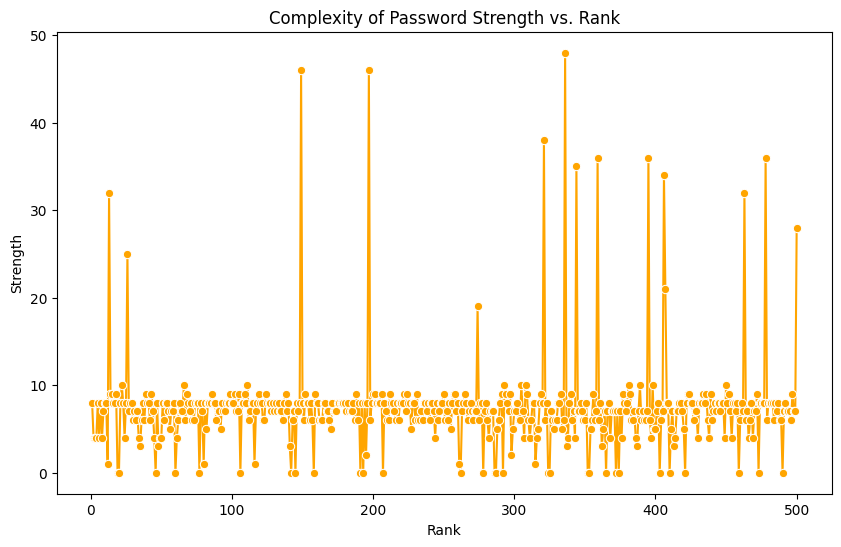

In [236]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='rank', y='strength', data=password_data, marker='o', color='orange')
plt.title('Complexity of Password Strength vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Strength')
plt.show()

#Word Cloud of Common Substrings

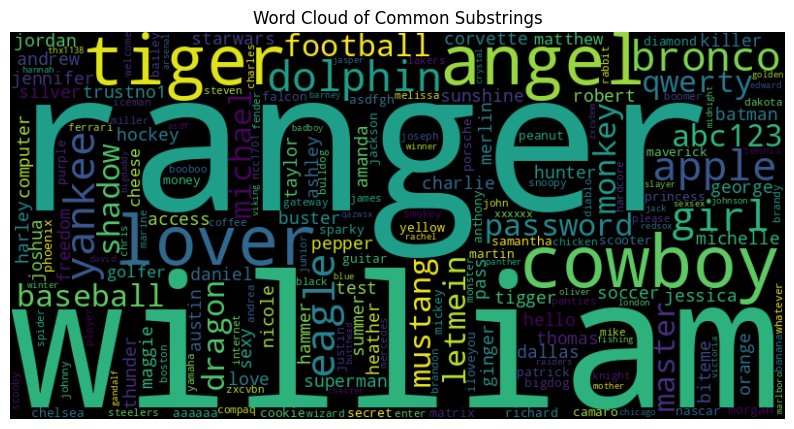

In [237]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(password_data['password']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Common Substrings', color='black')
plt.axis('off')
plt.show()

#**Hypothesis Testing**

#Perform ANOVA

In [238]:
password_clean = password_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['strength'])

categories = password_clean['category'].unique()

data_for_anova = []

for category in categories:
    data_for_anova.append(password_clean[password_clean['category'] == category]['strength'])

anova_result = stats.f_oneway(*data_for_anova)

print(f"ANOVA Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA Result: F-statistic = 6.7018230667027785, p-value = 4.4571507376823045e-09


#Perform Kruskal-Wallis H-test

In [239]:
kruskal_result = stats.kruskal(
    password_data[password_data['category'] == 'password-related']['strength'],
    password_data[password_data['category'] == 'simple-alphanumeric']['strength']
)

print(f"Kruskal-Wallis Result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")


Kruskal-Wallis Result: H-statistic = 8.932654461467251, p-value = 0.0028011695172100812


#**Correlation Analysis**

#Pearson Correlation

In [240]:
password_clean = password_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['value', 'strength'])

correlation, p_value = stats.pearsonr(password_clean['value'], password_clean['strength'])

print(f"Pearson Correlation: {correlation}, p-value = {p_value}")


Pearson Correlation: 0.3268752829199508, p-value = 6.489771543910367e-14


#Correlation Matrix

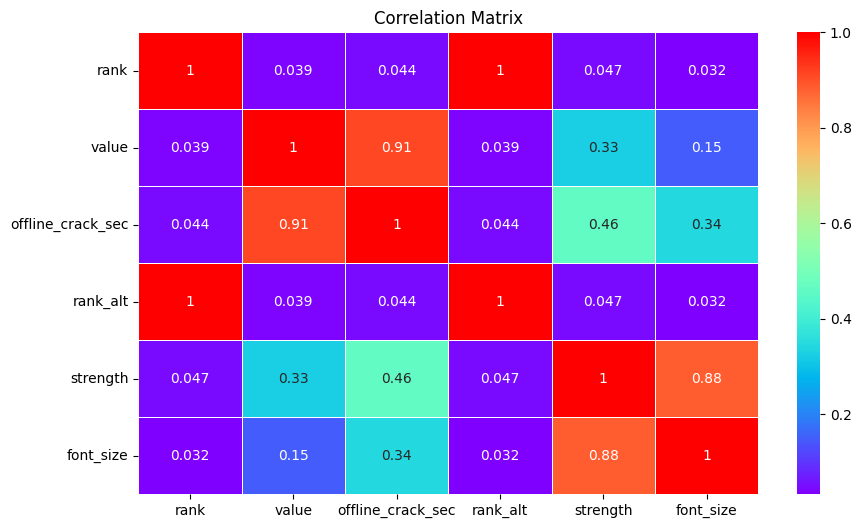

In [241]:
numeric_columns = password_data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = password_data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#**Supervised Machine Learning Model**

#Model of Support Vector Machine

In [243]:
label_encoders = {}
for column in ['category', 'time_unit']:
    le = LabelEncoder()
    password_data[column] = le.fit_transform(password_data[column])
    label_encoders[column] = le

password_data_clean = password_data.dropna()

features = password_data_clean[['category', 'value', 'time_unit', 'offline_crack_sec', 'rank_alt', 'strength', 'font_size']]
target = password_data_clean['category']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy of Support Vector Machine:", accuracy_score(y_test, y_pred))
print("\nClassification Report of Support Vector Machine:\n", classification_report(y_test, y_pred))


Accuracy of Support Vector Machine: 0.92

Classification Report of Support Vector Machine:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        12
           3       1.00      0.67      0.80         3
           4       0.98      1.00      0.99        50
           5       0.82      1.00      0.90         9
           6       1.00      0.33      0.50         6
           7       0.00      0.00      0.00         6
           8       0.79      0.96      0.86        23
           9       0.89      1.00      0.94         8

    accuracy                           0.92       150
   macro avg       0.85      0.80      0.80       150
weighted avg       0.90      0.92      0.90       150



<ipython-input-243-b45223ec90a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data[column] = le.fit_transform(password_data[column])
<ipython-input-243-b45223ec90a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data[column] = le.fit_transform(password_data[column])


#Confusion Matrix of Support Vector Machine

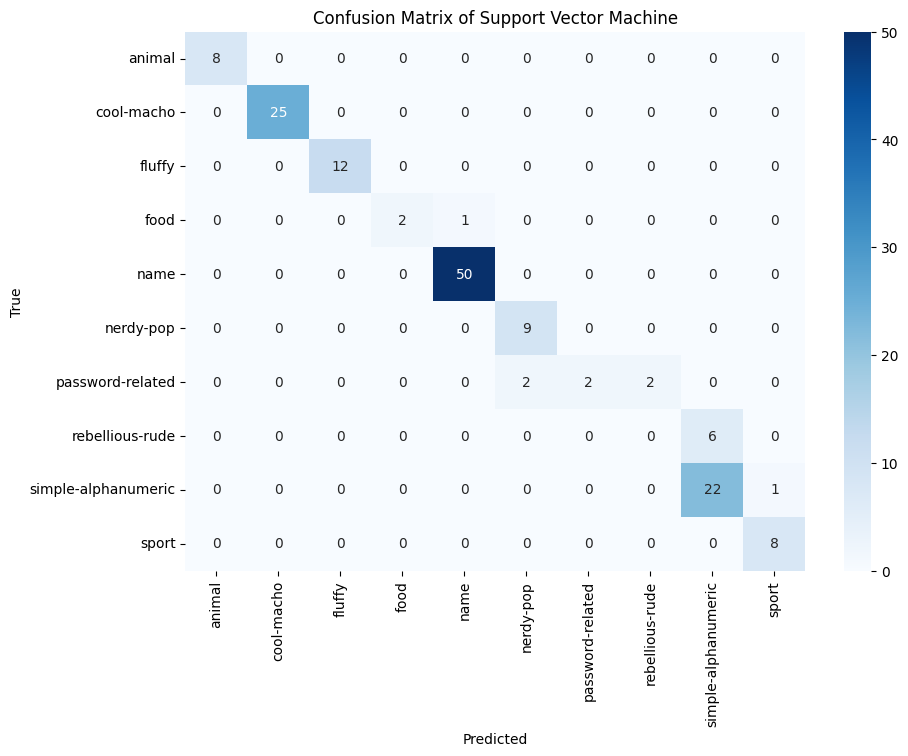

In [244]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['category'].classes_, yticklabels=label_encoders['category'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()

#**Unsupervised Machine Learning Model**

#Model of k-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

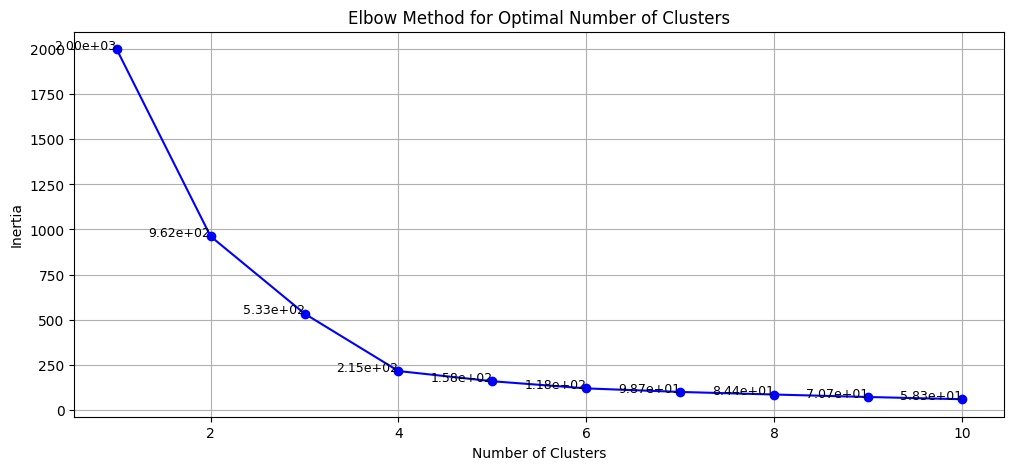

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-245-a5ad78ed3510>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data['Cluster'] = clusters


Cluster Summary:


,Cluster,value_mean,value_median,value_std,offline_crack_sec_mean,offline_crack_sec_median,offline_crack_sec_std,strength_mean,strength_median,strength_std,font_size_mean,font_size_median,font_size_std
0,0,4.912284,3.72,3.223064,0.266573,0.00321,0.688299,6.631687,7.0,2.372989,9.91358,11.0,2.868374
1,1,92.270000,92.27,0.000000,29.082500,29.02000,0.125000,33.750000,31.0,10.210289,23.00000,22.0,3.559026
2,2,4.488000,3.13,4.530207,0.412022,0.41420,0.415340,35.800000,36.0,7.161626,23.90000,24.0,2.514403


In [245]:
features = password_data[['value', 'offline_crack_sec', 'strength', 'font_size']]

features = features.fillna(features.median())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')

for i, value in enumerate(inertia):
    plt.text(i + 1, value, f'{value:.2e}', fontsize=9, ha='right')

plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

password_data['Cluster'] = clusters

cluster_summary = password_data.groupby('Cluster').agg({
    'value': ['mean', 'median', 'std'],
    'offline_crack_sec': ['mean', 'median', 'std'],
    'strength': ['mean', 'median', 'std'],
    'font_size': ['mean', 'median', 'std']
})

cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.reset_index()

print("Cluster Summary:")
cluster_summary.head()


#Model of Principal Component Analysis

Explained variance ratio by each principal component:
[0.51054544 0.25595719]
        PC1       PC2
0  0.463503  0.184812
1 -0.093647  1.401582
2 -1.055324  0.253966
3 -0.506758  0.908033
4 -0.150481 -0.370149


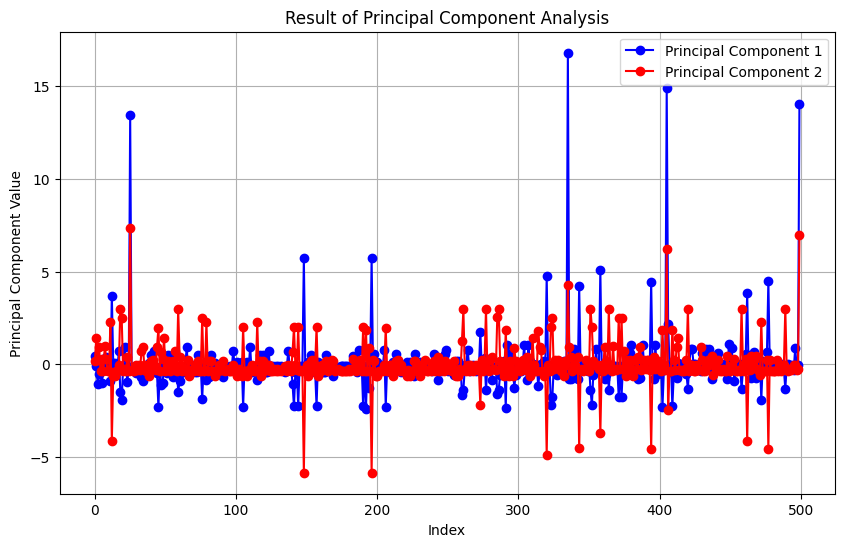

In [246]:
numerical_data = password_data[['value', 'offline_crack_sec', 'rank_alt', 'strength', 'font_size']]

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numerical_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

print(pca_data.head())

plt.figure(figsize=(10, 6))
plt.plot(pca_data['PC1'], label='Principal Component 1', marker='o', linestyle='-', color='blue')
plt.plot(pca_data['PC2'], label='Principal Component 2', marker='o', linestyle='-', color='red')
plt.title('Result of Principal Component Analysis')
plt.xlabel('Index')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()

#**Deep Learning Model**

#Model of  Recurrent Neural Networks

In [247]:
label_encoder = LabelEncoder()
password_data['category'] = label_encoder.fit_transform(password_data['category'])
password_data['time_unit'] = label_encoder.fit_transform(password_data['time_unit'])

features = password_data[['category', 'time_unit', 'offline_crack_sec', 'rank_alt', 'strength', 'font_size']].values
target = password_data['rank'].values

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)
print("Mean Absolute Error of Recurrent Neural Networks:", mae)
print("Mean Squared Error of Recurrent Neural Networks:", mse)
print("Root Mean Squared Error of Recurrent Neural Networks:", rmse)
print("R-squared Score of Recurrent Neural Networks:", r2)


Epoch 1/100


<ipython-input-247-ace9989237ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data['category'] = label_encoder.fit_transform(password_data['category'])
<ipython-input-247-ace9989237ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data['time_unit'] = label_encoder.fit_transform(password_data['time_unit'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 74448.1562 - val_loss: 87342.5234
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85777.7891 - val_loss: 86880.5469
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80466.7109 - val_loss: 86272.2500
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76731.8984 - val_loss: 85415.3828
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75563.8438 - val_loss: 84201.8516
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81524.5391 - val_loss: 82540.9922
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76681.2109 - val_loss: 80311.1172
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71071.0156 - val_loss: 77491.2109
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66497.9922 - val_loss: 73861.9844
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64578.8906 - val_loss: 69405.8047
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69822.5312 - val_los

#Model Loss and Predictions vs Actual Values of Recurrent Neural Networks

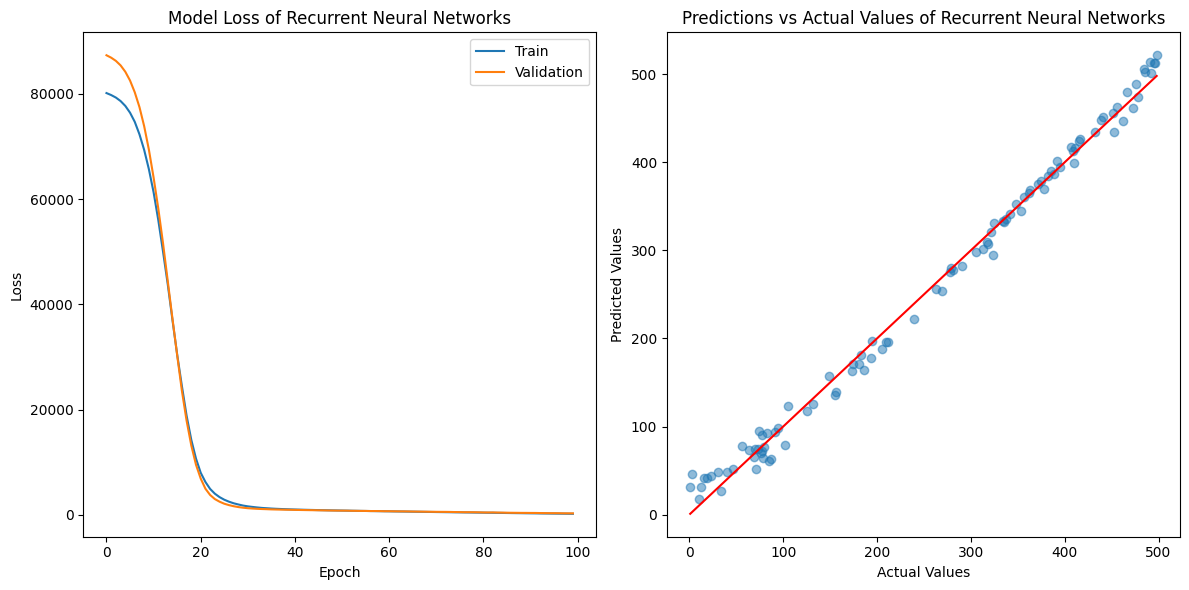

In [248]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss of Recurrent Neural Networks')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values of Recurrent Neural Networks')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  #

plt.tight_layout()
plt.show()

#Model of Long Short-Term Memory

In [249]:
label_encoder = LabelEncoder()
password_data['category'] = label_encoder.fit_transform(password_data['category'])
password_data['time_unit'] = label_encoder.fit_transform(password_data['time_unit'])

features = password_data[['category', 'time_unit', 'offline_crack_sec', 'rank_alt', 'strength', 'font_size']].values
target = password_data['rank'].values

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

features = features.reshape((features.shape[0], 1, features.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)
print("Mean Absolute Error of Long Short-Term Memory:", mae)
print("Mean Squared Error of Long Short-Term Memory:", mse)
print("Root Mean Squared Error of Long Short-Term Memory:", rmse)
print("R-squared Score of Long Short-Term Memory:", r2)


<ipython-input-249-e32d64af1da2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data['category'] = label_encoder.fit_transform(password_data['category'])
<ipython-input-249-e32d64af1da2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  password_data['time_unit'] = label_encoder.fit_transform(password_data['time_unit'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pr

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 78791.8828 - val_loss: 87616.4844
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 80133.7891 - val_loss: 87479.5547
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84304.8516 - val_loss: 87119.1484
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 82192.6562 - val_loss: 86183.7656
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77787.0469 - val_loss: 83978.8594
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75023.5625 - val_loss: 79763.2656
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 74354.3672 - val_loss: 73512.8281
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 64708.7891 - val_loss: 65975.2109
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 56517.4336 - val_loss: 57737.6445
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 49889.3164 - val_loss: 49343.9453
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss

#Model Loss and Predictions vs Actual Values of Long Short-Term Memory

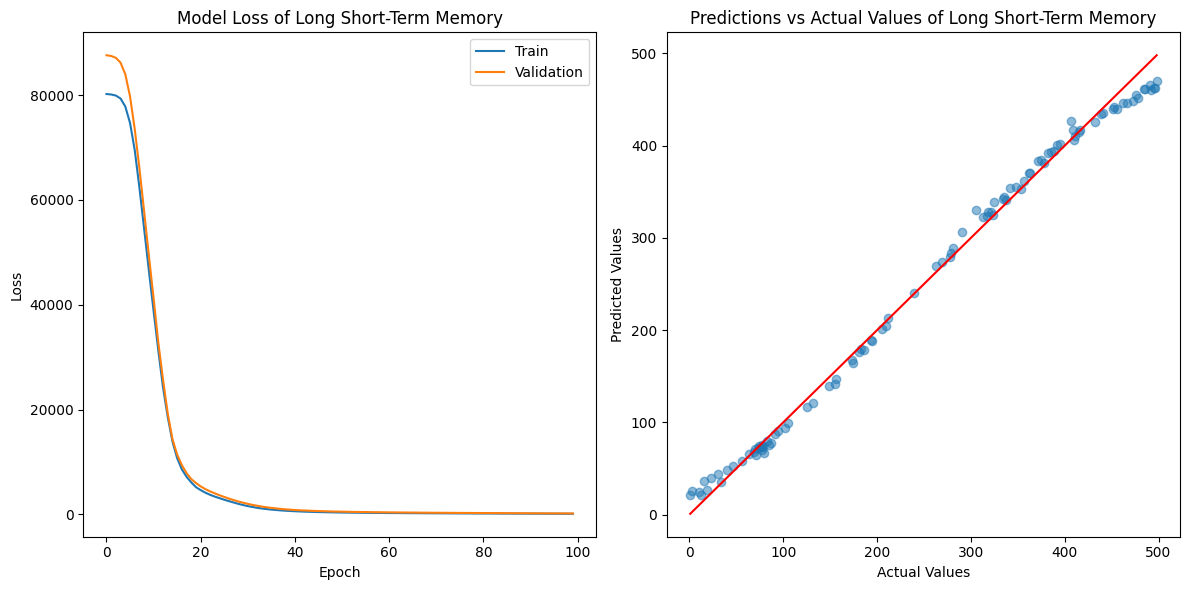

In [250]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss of Long Short-Term Memory')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values of Long Short-Term Memory')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.tight_layout()
plt.show()

#Comparison of RNN and LSTM Performance Metrics

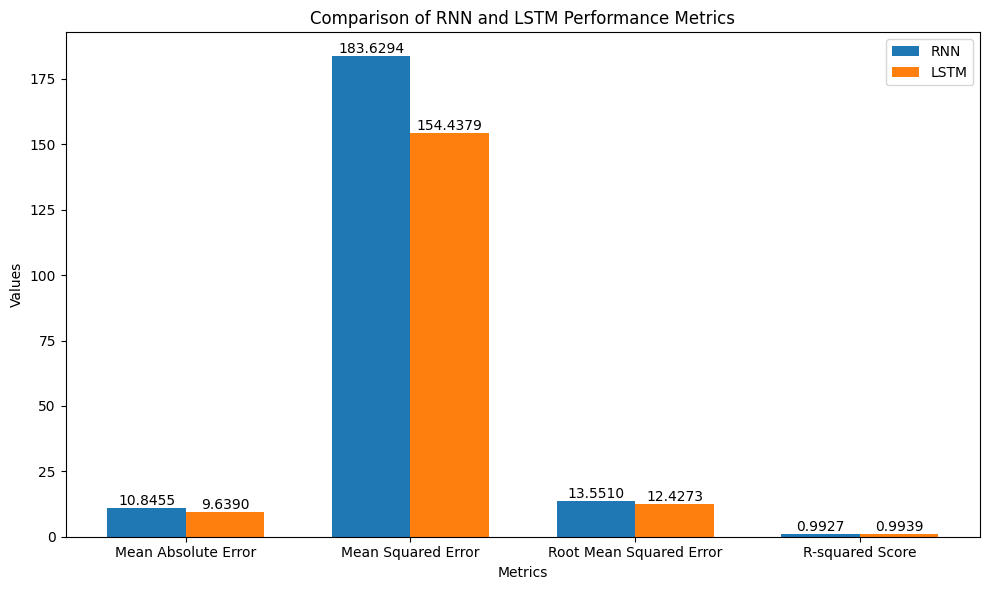

In [293]:
metrics = {
    'Mean Absolute Error': [10.845524730682373, 9.6390185546875],
    'Mean Squared Error': [183.629361931521, 154.43787195088342],
    'Root Mean Squared Error': [13.550991178933037, 12.427303486713576],
    'R-squared Score': [0.9927330579041431, 0.9938882809313854]
}

models = ['RNN', 'LSTM']

num_metrics = len(metrics)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(num_metrics)

bars_rnn = plt.bar(index, [metrics[metric][0] for metric in metrics], bar_width, label='RNN')
bars_lstm = plt.bar(index + bar_width, [metrics[metric][1] for metric in metrics], bar_width, label='LSTM')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of RNN and LSTM Performance Metrics')
plt.xticks(index + bar_width / 2, list(metrics.keys()))
plt.legend()

def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

add_values(bars_rnn)
add_values(bars_lstm)

plt.tight_layout()
plt.show()


#Model of Generative Adversarial Networks

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━

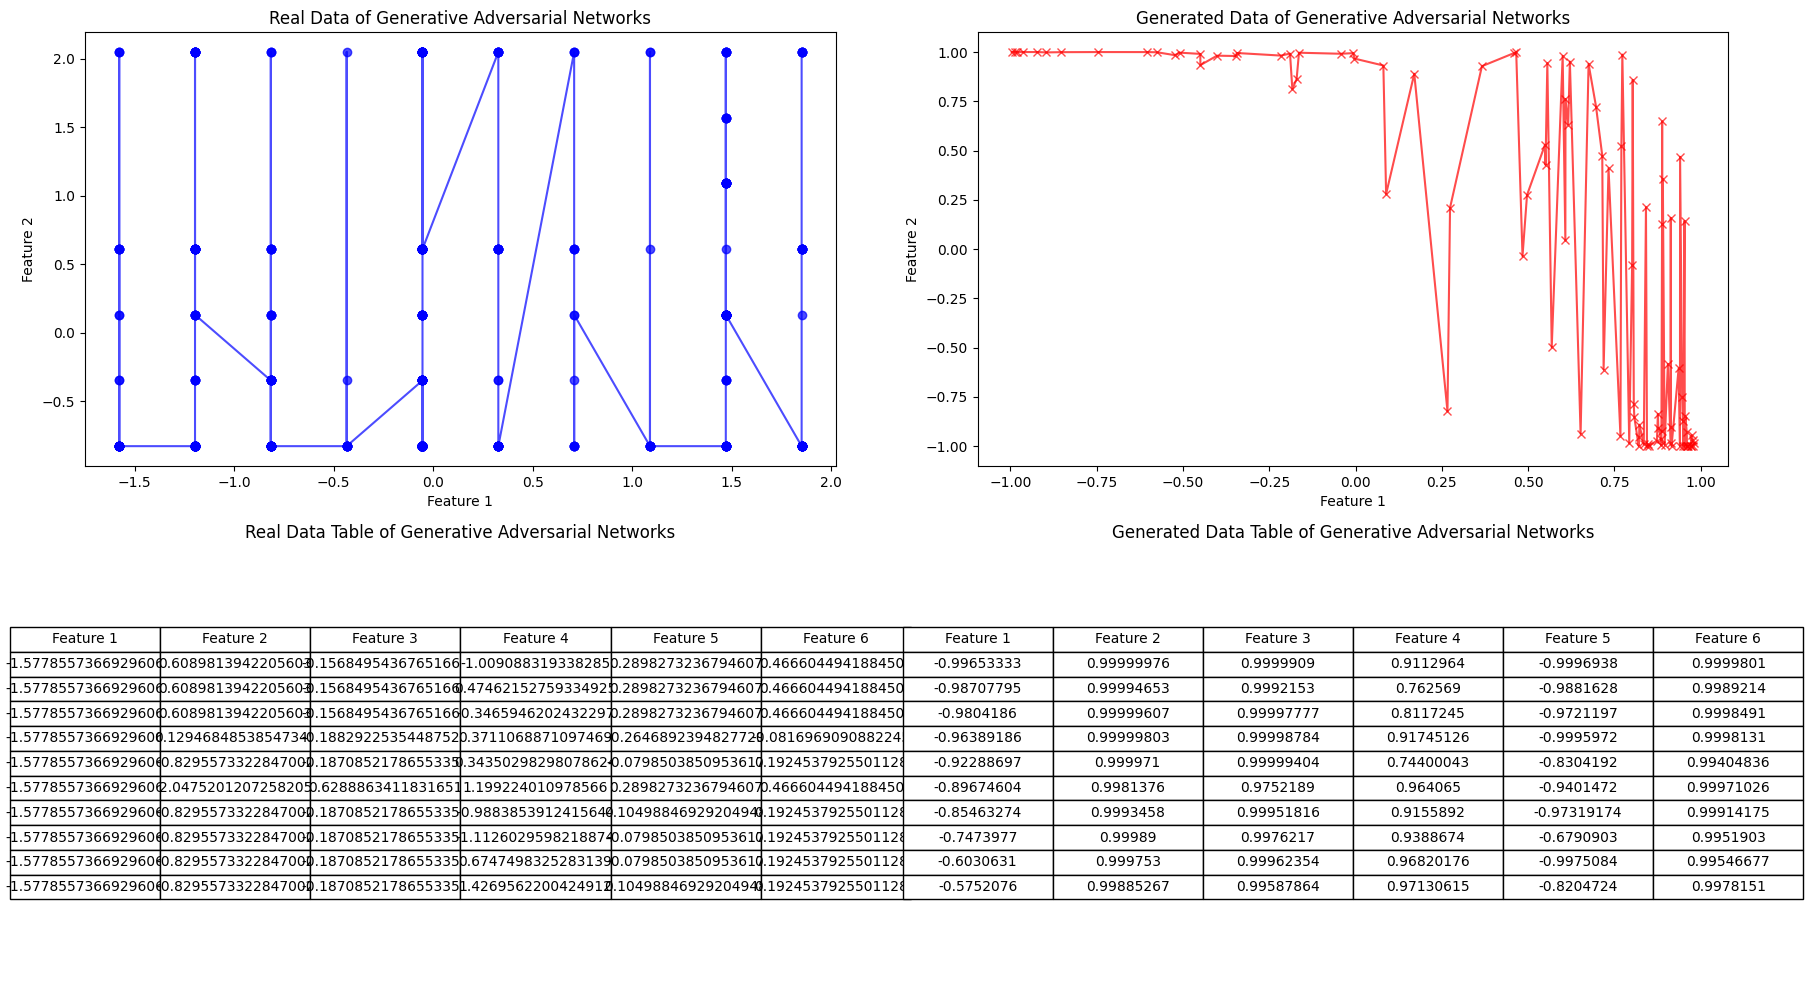

In [259]:
password_data = password_data.dropna()

label_encoder = LabelEncoder()
password_data['category'] = label_encoder.fit_transform(password_data['category'])
password_data['time_unit'] = label_encoder.fit_transform(password_data['time_unit'])

features = password_data[['category', 'time_unit', 'offline_crack_sec', 'rank_alt', 'strength', 'font_size']].values
target = password_data['rank'].values

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

z_dim = 100

def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(features.shape[1], activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=features.shape[1]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

def train_gan(epochs=100, batch_size=64):
    for epoch in range(epochs):

        idx = np.random.randint(0, features.shape[0], batch_size)
        real_data = features[idx]
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        fake_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

train_gan(epochs=100, batch_size=64)

noise = np.random.normal(0, 1, (100, z_dim))
generated_data = generator.predict(noise)

sorted_indices_real = np.argsort(features[:, 0])
sorted_indices_generated = np.argsort(generated_data[:, 0])

features_sorted = features[sorted_indices_real]
generated_data_sorted = generated_data[sorted_indices_generated]

plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.plot(features_sorted[:, 0], features_sorted[:, 1], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Real Data of Generative Adversarial Networks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)
plt.plot(generated_data_sorted[:, 0], generated_data_sorted[:, 1], marker='x', linestyle='-', color='r', alpha=0.7)
plt.title('Generated Data of Generative Adversarial Networks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 3)
plt.axis('off')
table_real = plt.table(cellText=features_sorted[:10], colLabels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'], cellLoc='center', loc='center')
table_real.auto_set_font_size(False)
table_real.set_fontsize(10)
table_real.scale(1.2, 1.2)
plt.title('Real Data Table of Generative Adversarial Networks')

plt.subplot(2, 2, 4)
plt.axis('off')
table_generated = plt.table(cellText=generated_data_sorted[:10], colLabels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'], cellLoc='center', loc='center')
table_generated.auto_set_font_size(False)
table_generated.set_fontsize(10)
table_generated.scale(1.2, 1.2)
plt.title('Generated Data Table of Generative Adversarial Networks')

plt.tight_layout()
plt.show()


#Entropy Calculation

In [265]:
def calculate_entropy(password):
    length = len(password)
    unique_chars = len(set(password))
    entropy = length * np.log2(unique_chars)
    return entropy

password_data['entropy'] = password_data['password'].apply(calculate_entropy)
print(password_data[['password', 'entropy']])


     password    entropy
0    password  22.458839
1      123456  15.509775
2    12345678  24.000000
3        1234   8.000000
4      qwerty  15.509775
..        ...        ...
495    reddog  13.931569
496  alexande  20.679700
497   college  16.253497
498    jester  13.931569
499  passw0rd  22.458839

[500 rows x 2 columns]


#Password Strength Meters

In [261]:
def password_strength(password):
    entropy = calculate_entropy(password)
    length = len(password)

    if length >= 12 and entropy > 40:
        return 'Very Strong'
    elif length >= 8 and entropy > 20:
        return 'Strong'
    elif length >= 6 and entropy > 10:
        return 'Moderate'
    else:
        return 'Weak'

password_data['strength'] = password_data['password'].apply(password_strength)
print(password_data[['password', 'strength']])


     password  strength
0    password    Strong
1      123456  Moderate
2    12345678    Strong
3        1234      Weak
4      qwerty  Moderate
..        ...       ...
495    reddog  Moderate
496  alexande    Strong
497   college  Moderate
498    jester  Moderate
499  passw0rd    Strong

[500 rows x 2 columns]


#Simulation of Attacks

Enter the minimum guess crack time (seconds): 0.5
Enter the maximum guess crack time (seconds): 5.0
Enter the passwords: 12345678
Enter the minimum spray crack time (seconds): 0.5
Enter the maximum spray crack time (seconds): 3.0


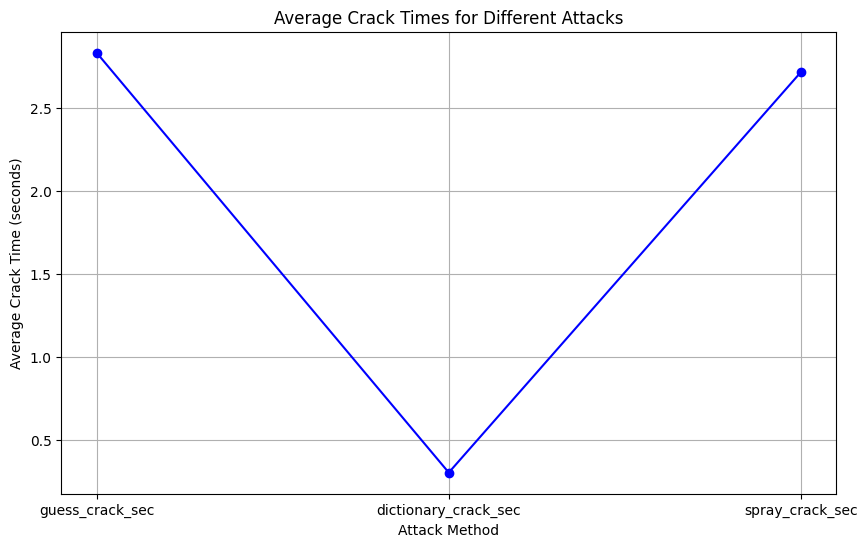

In [294]:
low_guess_time = float(input("Enter the minimum guess crack time (seconds): "))
high_guess_time = float(input("Enter the maximum guess crack time (seconds): "))

def guess_attack(password_data, low, high):
    password_data['guess_crack_sec'] = np.random.uniform(low=low, high=high, size=len(password_data))
    return password_data

password_data = guess_attack(password_data, low_guess_time, high_guess_time)

common_passwords = input("Enter the passwords: ").split(',')

def dictionary_attack(password_data, common_passwords):
    password_data['dictionary_crack_sec'] = np.where(password_data['password'].isin(common_passwords),
                                                     np.random.uniform(low=0.1, high=1, size=len(password_data)),
                                                     np.nan)
    return password_data

password_data = dictionary_attack(password_data, [pwd.strip() for pwd in common_passwords])

low_spray_time = float(input("Enter the minimum spray crack time (seconds): "))
high_spray_time = float(input("Enter the maximum spray crack time (seconds): "))

def password_spray_attack(password_data, common_passwords, low, high):
    password_data['spray_crack_sec'] = np.nan
    for pwd in common_passwords:
        mask = password_data['password'] == pwd
        password_data.loc[mask, 'spray_crack_sec'] = np.random.uniform(low=low, high=high, size=mask.sum())
    return password_data

password_data = password_spray_attack(password_data, [pwd.strip() for pwd in common_passwords], low_spray_time, high_spray_time)

def plot_attack_results(password_data):

    avg_crack_times = password_data[['guess_crack_sec', 'dictionary_crack_sec', 'spray_crack_sec']].mean()

    fig, ax = plt.subplots(figsize=(10, 6))

    attack_methods = avg_crack_times.index
    avg_times = avg_crack_times.values

    ax.plot(attack_methods, avg_times, marker='o', linestyle='-', color='b')
    ax.set_xlabel('Attack Method')
    ax.set_ylabel('Average Crack Time (seconds)')
    ax.set_title('Average Crack Times for Different Attacks')
    plt.grid(True)
    plt.show()

plot_attack_results(password_data)


#Real-World Simulation

In [295]:
def simulate_cracking(password, crack_time_sec):
    print(f"Attempting to crack password: {password}")
    time.sleep(crack_time_sec)
    print(f"Password '{password}' cracked in {crack_time_sec} seconds")

num_passwords = int(input("Enter the number of passwords to test: "))

if num_passwords > len(password_data):
    num_passwords = len(password_data)
    print(f"Number of passwords to test exceeds the dataset size. Testing {num_passwords} passwords instead.")

for i in range(num_passwords):
    password = password_data.iloc[i]['password']
    crack_time_sec = password_data.iloc[i]['offline_crack_sec']

    proceed = input(f"Do you want to attempt cracking the password '{password}'? (yes/no): ").strip().lower()
    if proceed == 'yes':
        simulate_cracking(password, crack_time_sec)
    else:
        print(f"Skipping password '{password}'.")

password_data['crack_efficiency'] = password_data['offline_crack_sec'] / password_data['strength']

sorted_password_data = password_data.sort_values(by='crack_efficiency')

print(tabulate(sorted_password_data, headers='keys', tablefmt='grid'))


Enter the number of passwords to test: 3
Do you want to attempt cracking the password 'password'? (yes/no): yes
Attempting to crack password: password
Password 'password' cracked in 2.17 seconds
Do you want to attempt cracking the password '123456'? (yes/no): yes
Attempting to crack password: 123456
Password '123456' cracked in 1.1100000000000002e-05 seconds
Do you want to attempt cracking the password '12345678'? (yes/no): yes
Attempting to crack password: 12345678
Password '12345678' cracked in 0.00111 seconds
+-----+--------+------------+---------------------+---------+-------------+---------------------+------------+------------+-------------+---------------+-------------------+------------------------+-------------------+--------------------+
|     |   rank | password   | category            |   value | time_unit   |   offline_crack_sec |   rank_alt |   strength |   font_size | crack_time    |   guess_crack_sec |   dictionary_crack_sec |   spray_crack_sec |   crack_efficiency |
+=